##  Project 2, Part 2: Web Scraped Data Analysis and Visualizations

**Name: Denilson Wilson Aguilar Molina**

**Date: 04/02/2024**

In [22]:
#importing packages
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grabbing the URL of the Wikipedia page
response = r.get("https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2020)")

# The Converts It Into Text
wiki_text =response.text

# This the html content
soup = BeautifulSoup(wiki_text, 'html.parser')

# This finds the table containg the film data, I had to inspect the code to find this
feature_films_heading = soup.find('span', {'id': 'Feature_films'})

# This finds and uses the parent element of the heading.
if feature_films_heading:
    parent_element = feature_films_heading.find_parent()
        
# This finds the first table within the parent element, since it's the one i'll be using
    required_table = parent_element.find_next_sibling('table', class_='wikitable sortable')

    # This looks for the headers of the rows since they start with th
    header_tags = required_table.find_all('th')
    headers = [header.text.strip() for header in header_tags]
    print(headers)  # This would print the headers of the rows

    # This extracts the data rows
    rows = []

    # This searches for all tr of the table
    data_rows = required_table.find_all('tr')

    # This displays the extracted rows from the site
    for row in data_rows[1:]:
        value = row.find_all('td')
        beautified_value = [dp.text.strip() for dp in value]
        print(beautified_value)

    # This finds other tables affiliated with the "Feature films" section
    other_tables = []
    sibling = required_table.find_next_sibling()
    while sibling and sibling.name == 'table':
        other_tables.append(sibling)
        sibling = sibling.find_next_sibling()

    # This prints the content of the other tables (for demonstration purposes)
    for other_table in other_tables:
        header_tags = other_table.find_all('th')
        headers = [header.text.strip() for header in header_tags]
        print(headers)  # This would print the headers of the rows

        # This extracts the data rows
        rows = []

        # This searches for all tr of the table
        data_rows = other_table.find_all('tr')

        # This displays the extracted rows from the site
        for row in data_rows[1:]:
            value = row.find_all('td')
            beautified_value = [dp.text.strip() for dp in value]
            print(beautified_value)
else:
    print("Feature films section not found.") #This was included just because I KEEP RUNNING INTO AN ISSUE WHERE I COULDN'T GRAB THE CODE FRON THE SITE ITSELF.

['Title', 'Genre', 'Premiere', 'Runtime', 'Language']
['Ghost Stories', 'Horror anthology', 'January 1, 2020', '2 h 24 min', 'Hindi']
['A Fall from Grace', 'Thriller', 'January 17, 2020', '2 h', 'English']
['Airplane Mode', 'Comedy', 'January 23, 2020', '1 h 36 min', 'Portuguese']
['Horse Girl', 'Psychological drama', 'February 7, 2020', '1 h 44 min', 'English']
['To All the Boys: P.S. I Still Love You', 'Teen romantic comedy', 'February 12, 2020', '1 h 42 min', 'English']
['Isi & Ossi', 'Romantic comedy', 'February 14, 2020', '1 h 53 min', 'German']
['The Last Thing He Wanted', 'Political thriller', 'February 21, 2020', '1 h 55 min', 'English']
['Yeh Ballet', 'Drama', 'February 21, 2020', '1 h 57 min', 'Hindi']
['All the Bright Places', 'Teen romance', 'February 28, 2020', '1 h 48 min', 'English']
['Guilty', 'thriller drama', 'March 6, 2020', '1 h 59 min', 'Hindi']
['Spenser Confidential', 'Action comedy', 'March 6, 2020', '1 h 51 min', 'English']
['Lost Girls', 'Crime drama', 'March 

In [23]:
data = [
    ['Ghost Stories', 'Horror anthology', 'January 1, 2020', '2 h 24 min', 'Hindi'],
    ['A Fall from Grace', 'Thriller', 'January 17, 2020', '2 h', 'English'],
    ['Airplane Mode', 'Comedy', 'January 23, 2020', '1 h 36 min', 'Portuguese'],
    ['Horse Girl', 'Psychological drama', 'February 7, 2020', '1 h 44 min', 'English'],
    ['To All the Boys: P.S. I Still Love You', 'Teen romantic comedy', 'February 12, 2020', '1 h 42 min', 'English'],
    ['Isi & Ossi', 'Romantic comedy', 'February 14, 2020', '1 h 53 min', 'German'],
    ['The Last Thing He Wanted', 'Political thriller', 'February 21, 2020', '1 h 55 min', 'English'],
    ['Yeh Ballet', 'Drama', 'February 21, 2020', '1 h 57 min', 'Hindi'],
    ['All the Bright Places', 'Teen romance', 'February 28, 2020', '1 h 48 min', 'English'],
    ['Guilty', 'thriller drama', 'March 6, 2020', '1 h 59 min', 'Hindi'],
    ['Spenser Confidential', 'Action comedy', 'March 6, 2020', '1 h 51 min', 'English'],
    ['Lost Girls', 'Crime drama', 'March 13, 2020', '1 h 35 min', 'English'],
    ['Ultras', 'Sports', 'March 20, 2020', '1 h 49 min', 'Italian'],
    ['The Occupant', 'Thriller', 'March 25, 2020', '1 h 43 min', 'Spanish'],
    ['Maska', 'Romantic comedy', 'March 27, 2020', '1 h 51 min', 'Hindi'],
    ['The Decline', 'Action thriller', 'March 27, 2020', '1 h 23 min', 'French'],
    ['Uncorked', 'Drama', 'March 27, 2020', '1 h 44 min', 'English'],
    ['Coffee & Kareem', 'Action comedy', 'April 3, 2020', '1 h 28 min', 'English'],
    ['The Main Event', 'Sports comedy', 'April 10, 2020', '1 h 43 min', 'English'],
    ['Love Wedding Repeat', 'Romantic comedy', 'April 10, 2020', '1 h 40 min', 'English'],
    ['Tigertail', 'Drama', 'April 10, 2020', '1 h 31 min', 'English'],
    ['Earth and Blood', 'Action', 'April 17, 2020', '1 h 20 min', 'French'],
    ['Rising High', 'Satire drama', 'April 17, 2020', '1 h 34 min', 'German'],
    ['Sergio', 'Biopic', 'April 17, 2020', '1 h 58 min', 'English'],
    ['The Willoughbys', 'Animated comedy', 'April 22, 2020', '1 h 32 min', 'English'],
    ['Time to Hunt', 'Action thriller', 'April 23, 2020', '2 h 15 min', 'Korean'],
    ['Extraction', 'Action', 'April 24, 2020', '1 h 57 min', 'English'],
    ['Dangerous Lies', 'Thriller', 'April 30, 2020', '1 h 37 min', 'English'],
    ['Rich in Love', 'Romantic comedy', 'April 30, 2020', '1 h 45 min', 'Portuguese'],
    ['All Day and a Night', 'Drama', 'May 1, 2020', '2 h 1 min', 'English'],
    ['Mrs. Serial Killer', 'Crime', 'May 1, 2020', '1 h 47 min', 'Hindi'],
    ['The Half of It', 'Teen romance', 'May 1, 2020', '1 h 45 min', 'English'],
    ['The Wrong Missy', 'Black comedy', 'May 13, 2020', '1 h 30 min', 'English'],
    ['The Lovebirds', 'Romantic comedy', 'May 22, 2020', '1 h 27 min', 'English'],
    ["I'm No Longer Here", 'Drama', 'May 27, 2020', '1 h 52 min', 'Spanish'],
    ['Intuition', 'Crime thriller', 'May 28, 2020', '1 h 56 min', 'Spanish'],
    ['Choked: Paisa Bolta Hai', 'Drama', 'June 5, 2020', '1 h 54 min', 'Hindi'],
    ['The Last Days of American Crime', 'Heist thriller', 'June 5, 2020', '2 h 29 min', 'English'],
    ['Da 5 Bloods', 'War drama', 'June 12, 2020', '2 h 35 min', 'English'],
    ['A Whisker Away', 'Anime fantasy', 'June 18, 2020', '1 h 45 min', 'Japanese'],
    ['Feel the Beat', 'Family / Comedy drama', 'June 19, 2020', '1 h 49 min', 'English'],
    ['Lost Bullet', 'Action', 'June 19, 2020', '1 h 33 min', 'French'],
    ['One-Way to Tomorrow', 'Romantic drama', 'June 19, 2020', '1 h 30 min', 'Turkish'],
    ['Bulbbul', 'Horror', 'June 24, 2020', '1 h 34 min', 'Hindi'],
    ["Nobody Knows I'm Here", 'Drama', 'June 24, 2020', '1 h 31 min', 'Spanish'],
    ['Eurovision Song Contest: The Story of Fire Saga', 'Musical comedy', 'June 26, 2020', '2 h 3 min', 'English'],
    ['Under the Riccione Sun', 'Romantic teenage drama', 'July 1, 2020', '1 h 42 min', 'Italian'],
    ['Desperados', 'Romantic comedy', 'July 3, 2020', '1 h 46 min', 'English'],
    ['The Old Guard', 'Superhero', 'July 10, 2020', '2 h 5 min', 'English'],
    ['The Players', 'Comedy', 'July 15, 2020', '1 h 28 min', 'Italian'],
    ['Fatal Affair', 'Psychological thriller', 'July 16, 2020', '1 h 29 min', 'English'],
    ['The Larva Island Movie', 'Animation', 'July 23, 2020', '1 h 31 min', 'English'],
    ['Offering to the Storm', 'Crime thriller', 'July 24, 2020', '2 h 19 min', 'Spanish'],
    ['The Kissing Booth 2', 'Teen romantic comedy', 'July 24, 2020', '2 h 12 min', 'English'],
    ['Seriously Single', 'Comedy', 'July 31, 2020', '1 h 47 min', 'English'],
    ['Raat Akeli Hai', 'Thriller', 'July 31, 2020', '2 h 29 min', 'Hindi'],
    ['Work It', 'Dance comedy', 'August 7, 2020', '1 h 33 min', 'English'],
    ['Gunjan Saxena: The Kargil Girl', 'Biographical drama', 'August 12, 2020', '1 h 52 min', 'Hindi'],
    ['Project Power', 'Superhero', 'August 14, 2020', '1 h 53 min', 'English'],
    ['Fearless', 'Animation / Superhero', 'August 14, 2020', '1 h 31 min', 'English'],
    ['Crazy Awesome Teachers', 'Comedy drama', 'August 17, 2020', '1 h 41 min', 'Indonesian'],
    ['The Crimes That Bind', 'Crime drama', 'August 20, 2020', '1 h 39 min', 'Spanish'],
    ['The Sleepover', 'Action comedy', 'August 21, 2020', '1 h 43 min', 'English'],
    ["Class of '83", 'Crime / Drama', 'August 21, 2020', '1 h 38 min', 'Hindi'],
    ['Dark Forces', 'Thriller', 'August 21, 2020', '1 h 21 min', 'Spanish'],
    ['All Together Now', 'Drama', 'August 28, 2020', '1 h 33 min', 'English'],
    ['Unknown Origins', 'Thriller', 'August 28, 2020', '1 h 36 min', 'Spanish'],
    ["Freaks – You're One of Us", 'Supernatural drama', 'September 2, 2020', '1 h 32 min', 'German'],
    ['Love, Guaranteed', 'Romantic comedy', 'September 3, 2020', '1 h 31 min', 'English'],
    ["I'm Thinking of Ending Things", 'Psychological thriller', 'September 4, 2020', '2 h 14 min', 'English'],
    ['The Babysitter: Killer Queen', 'Comedy / Horror', 'September 10, 2020', '1 h 42 min', 'English'],
    ['Dad Wanted', 'Family', 'September 11, 2020', '1 h 43 min', 'Spanish'],
    ['The Devil All The Time', 'Psychological thriller', 'September 16, 2020', '2 h 18 min', 'English'],
    ['The Paramedic', 'Thriller', 'September 16, 2020', '1 h 34 min', 'Spanish'],
    ['Dolly Kitty Aur Woh Chamakte Sitare', 'Drama', 'September 18, 2020', '2 h', 'Hindi'],
    ['Whipped', 'Romantic comedy', 'September 18, 2020', '1 h 37 min', 'Indonesian'],
    ['The Boys in the Band', 'Drama', 'September 30, 2020', '2 h 2 min', 'English'],
    ['All Because of You', 'Action comedy', 'October 1, 2020', '1 h 41 min', 'Malay'],
    ['Òlòtūré', 'Crime drama', 'October 2, 2020', '1 h 46 min', 'English'],
    ['Serious Men', 'Comedy drama', 'October 2, 2020', '1 h 54 min', 'Hindi'],
    ['The Binding', 'Horror', 'October 2, 2020', '1 h 33 min', 'Italian'],
    ['Vampires vs. the Bronx', 'Horror comedy', 'October 2, 2020', '1 h 25 min', 'English'],
    ["You've Got This", 'Romantic comedy', 'October 2, 2020', '1 h 51 min', 'Spanish'],
    ['Hubie Halloween', 'Comedy', 'October 7, 2020', '1 h 43 min', 'English'],
    ['Ginny Weds Sunny', 'Romantic comedy', 'October 9, 2020', '2 h 5 min', 'Hindi'],
    ['The Forty-Year-Old Version', 'Comedy drama', 'October 9, 2020', '2 h 4 min', 'English'],
    ["A Babysitter's Guide to Monster Hunting", 'Comedy / Fantasy / Family', 'October 15, 2020', '1 h 38 min', 'English'],
    ['Love Like the Falling Rain', 'Teen romantic drama', 'October 15, 2020', '1 h 26 min', 'Indonesian'],
    ['The Trial of the Chicago 7', 'Historical legal drama', 'October 16, 2020', '2 h 10 min', 'English'],
    ['Rebecca', 'Romantic thriller', 'October 21, 2020', '2 h 3 min', 'English'],
    ['Cadaver', 'Horror', 'October 22, 2020', '1 h 26 min', 'Norwegian'],
    ['Over the Moon', 'Animated musical fantasy', 'October 23, 2020', '1 h 40 min', 'English'],
    ['Holidate', 'Christmas romantic comedy', 'October 28, 2020', '1 h 44 min', 'English'],
    ['Nobody Sleeps in the Woods Tonight', 'Horror', 'October 28, 2020', '1 h 43 min', 'Polish'],
    ['His House', 'Thriller', 'October 30, 2020', '1 h 33 min', 'English'],
    ['Kaali Khuhi', 'Horror', 'October 30, 2020', '1 h 30 min', 'Hindi'],
    ['Rogue City', 'Crime', 'October 30, 2020', '1 h 56 min', 'French'],
    ['The Day of the Lord', 'Horror', 'October 30, 2020', '1 h 33 min', 'Spanish'],
    ['Operation Christmas Drop', 'Christmas romantic comedy', 'November 5, 2020', '1 h 36 min', 'English'],
    ['Citation', 'Drama', 'November 6, 2020', '2 h 31 min', 'English'],
    ['What We Wanted', 'Drama', 'November 11, 2020', '1 h 33 min', 'German'],
    ['Ludo', 'Anthology / Dark comedy', 'November 12, 2020', '2 h 30 min', 'Hindi'],
    ['Jingle Jangle: A Christmas Journey', 'Family / Christmas musical', 'November 13, 2020', '1 h 59 min', 'English'],
    ['The Life Ahead', 'Drama', 'November 13, 2020', '1 h 35 min', 'Italian'],
    ['The Princess Switch: Switched Again', 'Christmas romantic comedy', 'November 19, 2020', '1 h 37 min', 'English'],
    ['Christmas on the Square', 'Christmas musical', 'November 22, 2020', '1 h 38 min', 'English'],
    ['Hillbilly Elegy', 'Drama', 'November 24, 2020', '1 h 57 min', 'English'],
    ['Notes for My Son', 'Drama', 'November 24, 2020', '1 h 23 min', 'Spanish'],
    ['The Christmas Chronicles: Part Two', 'Christmas comedy', 'November 25, 2020', '1 h 55 min', 'English'],
    ['The Beast', 'Action thriller', 'November 27, 2020', '1 h 39 min', 'Italian'],
    ['The Call', 'Psychological thriller', 'November 27, 2020', '1 h 52 min', 'Korean'],
    ['Finding Agnes', 'Drama', 'November 30, 2020', '1 h 45 min', 'Filipino'],
    ['Just Another Christmas', 'Christmas comedy', 'December 3, 2020', '1 h 41 min', 'Portuguese'],
    ['Christmas Crossfire', 'Christmas thriller', 'December 4, 2020', '1 h 46 min', 'German'],
    ['Leyla Everlasting', 'Comedy', 'December 4, 2020', '1 h 52 min', 'Turkish'],
    ['Mank', 'Biopic', 'December 4, 2020', '2 h 12 min', 'English'],
    ['The Claus Family', 'Christmas fantasy', 'December 7, 2020', '1 h 37 min', 'Dutch'],
    ['Rose Island', 'Comedy drama', 'December 9, 2020', '1 h 58 min', 'Italian'],
    ['The Prom', 'Musical', 'December 11, 2020', '2 h 12 min', 'English'],
    ['A California Christmas', 'Christmas romantic comedy', 'December 14, 2020', '1 h 47 min', 'English'],
    ["Ma Rainey's Black Bottom", 'Drama', 'December 18, 2020', '1 h 34 min', 'English'],
    ['The Midnight Sky', 'Science fiction', 'December 23, 2020', '1 h 58 min', 'English'],
    ['AK vs AK', 'Black comedy thriller', 'December 24, 2020', '1 h 49 min', 'Hindi'],
    ['We Can Be Heroes', 'Superhero', 'December 25, 2020', '1 h 40 min', 'English'],
] # I've decided to just grab and add the data that i gathered here as it was taking me hours to just try to get it within the file itself.
# The way that it was organized in the website itself was wrong-off so I had to work with the limitations in mind just to create this.

# This converts the data into a dataframe
df = pd.DataFrame(data, columns=['Title', 'Genre', 'Premiere', 'Runtime', 'Language'])

# This extracts month from the 'premiere' column and creates a new column 'month'
df['Month'] = df['Premiere'].apply(lambda x: x.split(' ')[0])

# This cleans the 'runtime' column and converts it to numeric values
df['Runtime (min)'] = df['Runtime'].apply(lambda x: int(x.split(' ')[0]) if x != 'TBA' else None)

# This converts the 'premiere' column into datetime format
df['Premiere'] = pd.to_datetime(df['Premiere'], errors='coerce')

The question I'm going to answer using the gathered data is "What are the most common genres for Netflix films?" I'll be making this into a top 10 list to simplify it, overall this should be an interesting discovery.

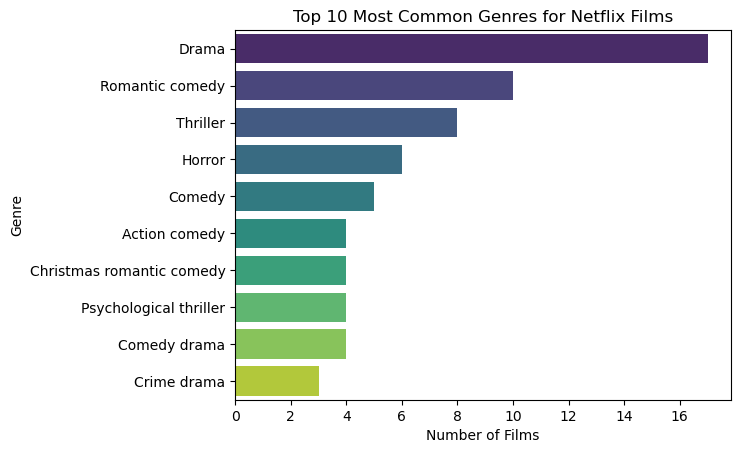

In [24]:
# What are the most common genres for Netflix films?
top_genres = df["Genre"].value_counts().head(10)#organzies theme by Genre
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis") #This uses a different palette color using sns
plt.xlabel("Number of Films") 
plt.ylabel("Genre")
plt.title("Top 10 Most Common Genres for Netflix Films")
plt.show()


It appears that Drama films were the most common genres for Netflix films during 2020, while Romance comedy, Thriller, Horror etc. are on the lower end as they don't seemingly isn't the same amount of them as Drama films at the time. It is interesting to see how low Crime drama films were during 2020 as they do end up increasing during 2021.

Here I'm answering the question, "What are the most common genres for Netflix films?" I'll be using a graph to display the top 5 most common language for Netflix films


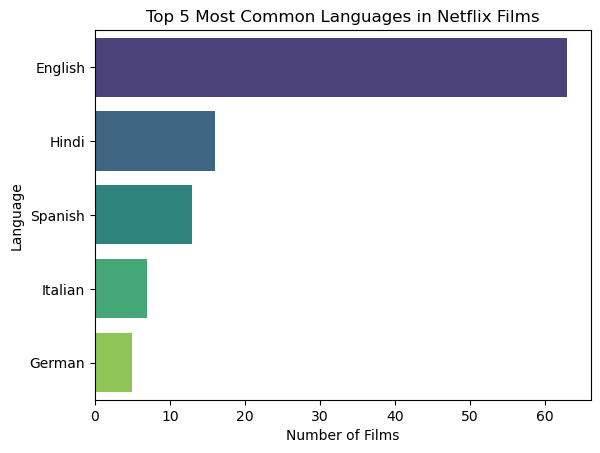

In [25]:
# What are the top 5 languages most commonly used in Netflix films?
top_languages = df["Language"].value_counts().head(5) #This grabs the lanuages and makes it to be the top 5 that are diaplayed
sns.barplot(x=top_languages.values, y=top_languages.index, palette="viridis") #use sns to change the color of the graph to be more appealing
plt.xlabel("Number of Films") #This gathers the overall amount of films
plt.ylabel("Language") 
plt.title("Top 5 Most Common Languages in Netflix Films")
plt.show()

It appears that the most common language is English for Netflix films, followed by Hindi, Spanish, Italian, and German, even during 2020 it appears that the majority of films were in English, while every other language weren't as prominent. There were over 60 English films during 2020 while on the lower end there were about 5 German films.

The question I'm going to be answering here is "How has the number of Netflix films released each month changed over time?
" This should help us deteremine if the number of films increases or decrease for Netflix as of 2020.

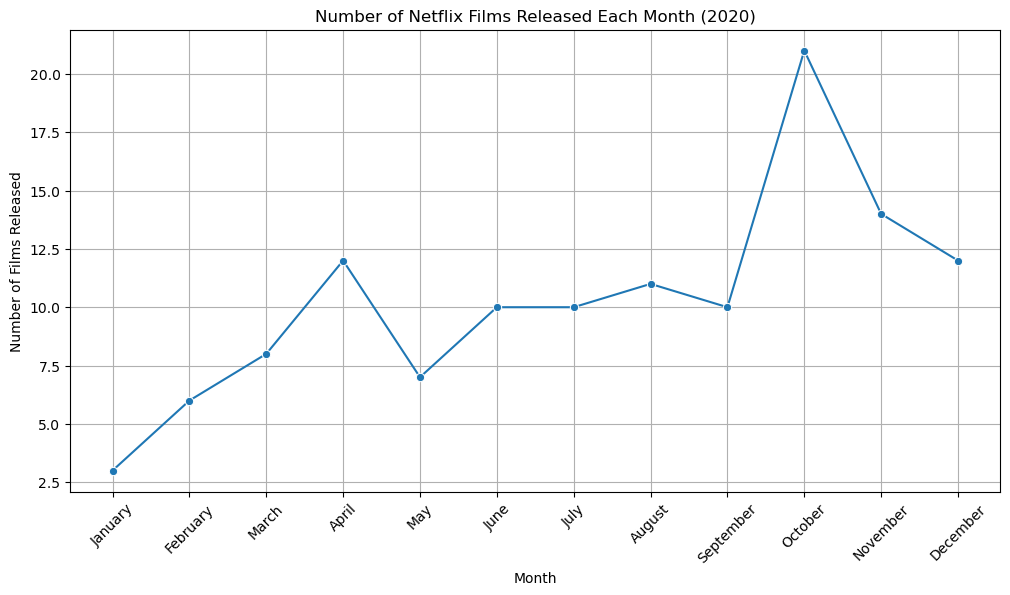

In [29]:
# I'm defining the order of the months here since I ran into an issue in which it was all scrambled 
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# This helps to convert the 'Month' column to categorical with the correct order
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

# How has the number of Netflix films released each month changed over time?
monthly_counts = df['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Films Released')
plt.title('Number of Netflix Films Released Each Month (2020)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

It appears that the month with the most films released during October, January only started off with 3 films, and it gradually increased during the months until April with 12 films, it then dropped to 6 films during May. It stayed around 10 films during June and July, 11 In August and back to 10 in September. It reached it's peak at 21 films during October and went down to 14 during November and 11 in December.

The question being answered here is "What are the top 5 Netflix films with the longest runtime?" I'll be using the runtime for the films to determine the answer for this one.

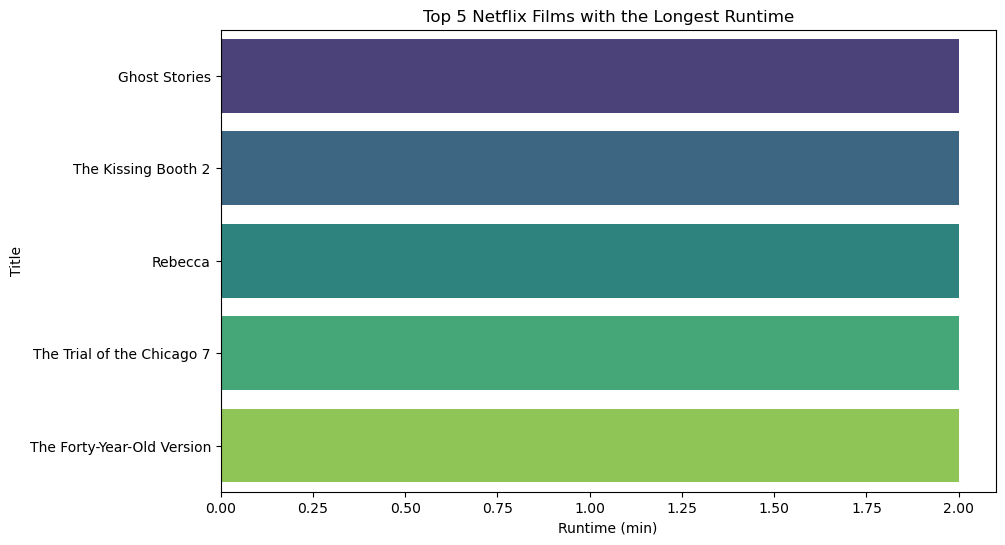

Top 5 Netflix films with the longest runtime:
                         Title     Runtime
0                Ghost Stories  2 h 24 min
53         The Kissing Booth 2  2 h 12 min
89                     Rebecca   2 h 3 min
88  The Trial of the Chicago 7  2 h 10 min
85  The Forty-Year-Old Version   2 h 4 min


In [27]:
#What are the top 5 Netflix films with the longest runtime?
top_longest_films = df.sort_values(by='Runtime (min)', ascending=False).head(5)

#I create a simple graph which only displays the top 5 longest running films to appear on, it doesn't exactly display the actual amount since i'd probably would need to do more just to make it work,
plt.figure(figsize=(10, 6))
sns.barplot(x='Runtime (min)', y='Title', data=top_longest_films, palette='viridis', order=top_longest_films['Title'])
plt.xlabel('Runtime (min)')
plt.ylabel('Title')
plt.title('Top 5 Netflix Films with the Longest Runtime')
plt.show()

# This only prints/displays the length of each of the films, this was on the simplier side to create.
top_longest_films = df.sort_values(by='Runtime (min)', ascending=False).head(5)
print("Top 5 Netflix films with the longest runtime:")
print(top_longest_films[['Title', 'Runtime']])

It appears that Ghost Stories was the longest running film as of 2020 on Netflix, followed by The Kissing Booth 2, The Trail of the Chicago 7, The Forty-Year Old Version, and Rebecca.

This was just a random additonal one I included just for testing out a differnt type of plotting, this is not part of the 4 main questions i went out to answer, the question being asnwer is "Does Lnauage and genre have anything to do with the films?"

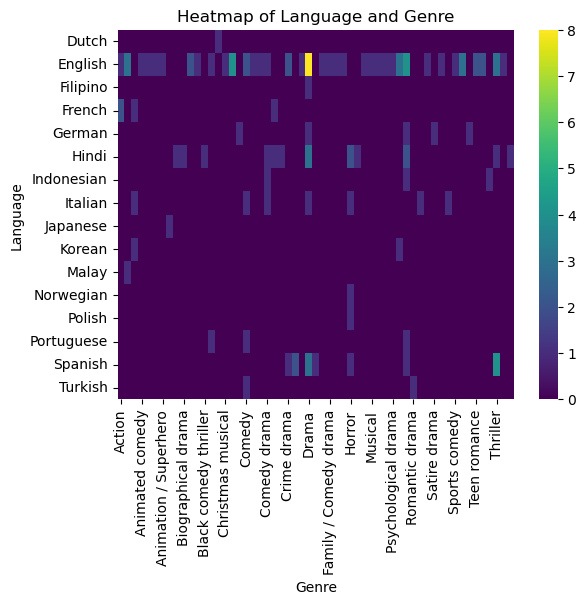

In [28]:
# Does language and genre have anything to do with films?
language_genre_cross = df.groupby(["Language", "Genre"]).size().unstack(fill_value=0)
sns.heatmap(language_genre_cross, cmap="viridis")
plt.xlabel("Genre")
plt.ylabel("Language")
plt.title("Heatmap of Language and Genre")
plt.show()

It does appear that English and Drama films were populary during 2020, the heatmap indicates it. It does appear to be the majority as well as the other genre don't heat up as much as the Drama films did with English.